<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Sequential Modelling using RNN
</div>



In [54]:
import numpy as np

In [55]:
alphabets = ''.join([chr(i) for i in range(ord('A'), ord('Z')+1)])

In [56]:
int_to_char = {i:j for i,j in enumerate(alphabets)}
char_to_int = {j:i for i,j in enumerate(alphabets)}

In [57]:
print(int_to_char)
print(char_to_int)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [58]:
seq_length = 1
X = []
y = []
for i in range(len(alphabets) - seq_length):
    seq_int = [alphabets[i]]
    seq_out = alphabets[i+1]
    X += [[char_to_int[seq_int[0]]]]
    y += [char_to_int[seq_out]]

In [59]:
X,y

([[0],
  [1],
  [2],
  [3],
  [4],
  [5],
  [6],
  [7],
  [8],
  [9],
  [10],
  [11],
  [12],
  [13],
  [14],
  [15],
  [16],
  [17],
  [18],
  [19],
  [20],
  [21],
  [22],
  [23],
  [24]],
 [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25])

In [60]:
X = np.reshape(X, (25,1,1))
print(X)

[[[ 0]]

 [[ 1]]

 [[ 2]]

 [[ 3]]

 [[ 4]]

 [[ 5]]

 [[ 6]]

 [[ 7]]

 [[ 8]]

 [[ 9]]

 [[10]]

 [[11]]

 [[12]]

 [[13]]

 [[14]]

 [[15]]

 [[16]]

 [[17]]

 [[18]]

 [[19]]

 [[20]]

 [[21]]

 [[22]]

 [[23]]

 [[24]]]


In [61]:
X = X/25

In [62]:
from keras.utils import to_categorical

In [63]:
y_new = to_categorical(y)
y_new.shape

(25, 26)

In [64]:
from keras.models import Sequential
from keras.layers import Input, Dense, SimpleRNN

In [73]:
model = Sequential()
model.add(Input((1,1)))
model.add(Dense(25, activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26, activation='softmax'))

In [74]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
from keras.utils import plot_model

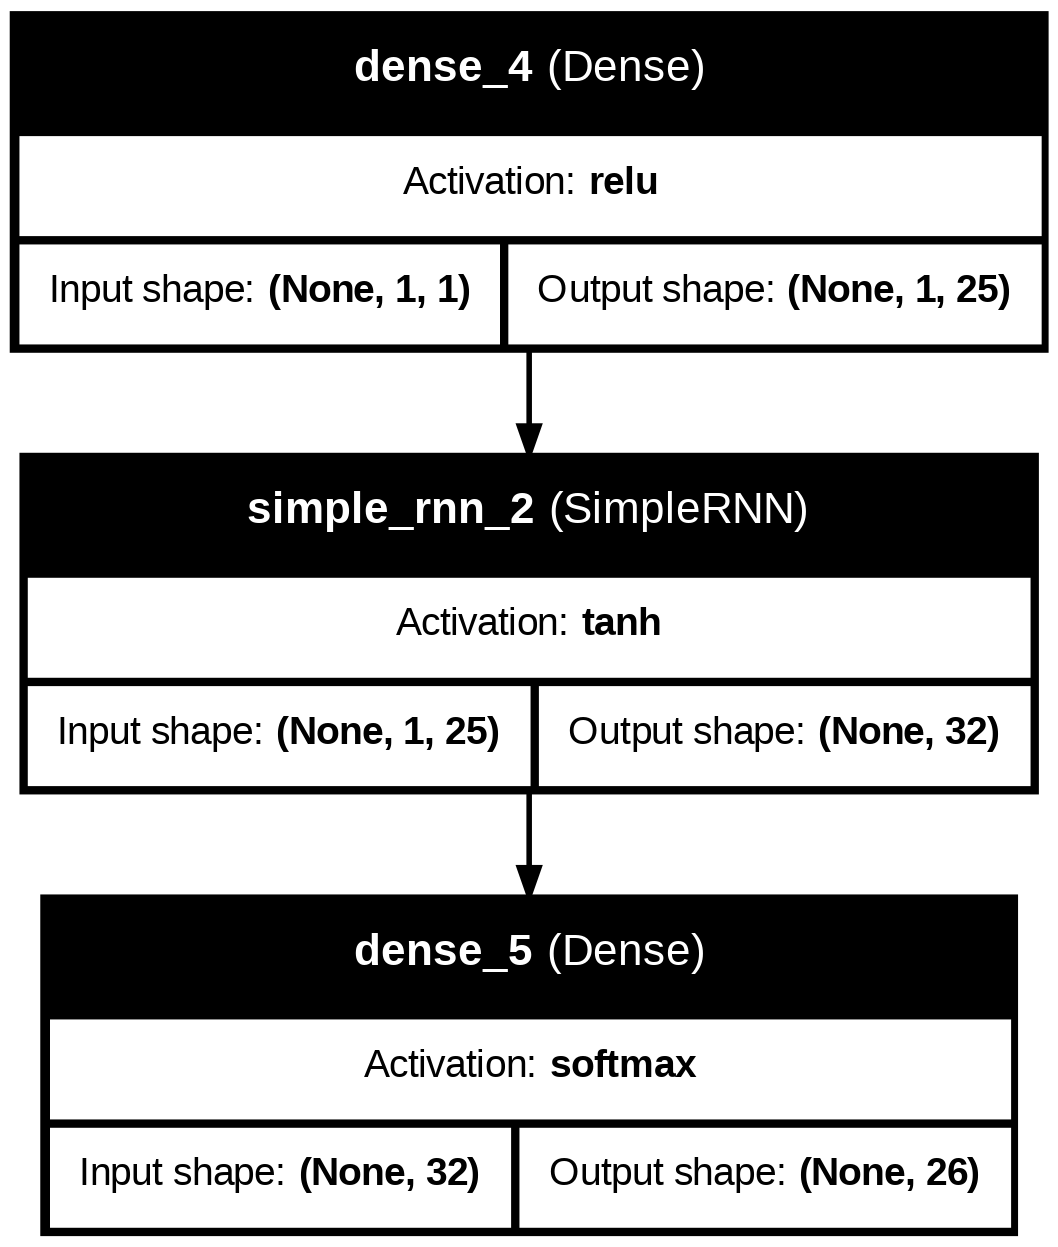

In [76]:
plot_model(
    model,
    show_layer_activations=True,
    show_shapes=True,
    show_layer_names=True
)

In [77]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [78]:
model.fit(
    X, y_new,
    epochs=1000,
    batch_size=1
)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1098 - loss: 3.2674    
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0605 - loss: 3.2604     
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0139 - loss: 3.2580      
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.2375
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2378 
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2187  
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1098 - loss: 3.2229     
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0605 - loss: 3.1785     
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0456 - loss: 3.1658
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1223 - loss: 3.1725
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1237 - loss: 3.1868     
Epoch 1

In [79]:
model.evaluate(X,y_new, batch_size=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.4027  


[0.6313202977180481, 0.9599999785423279]

In [93]:
test = 'P'

test = char_to_int[test]
test = test/25
test = np.reshape(test, (1,1,1))
pred = model.predict(test)
int_to_char[np.argmax([pred])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Q'

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Sequenc length 3
</div>


In [109]:
seq_length = 3
X = []
y = []
for i in range(len(alphabets) - seq_length):
    seq_in = alphabets[i:i+seq_length]
    seq_out = alphabets[i+seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])


In [111]:
np.array(X).shape

(23, 3)

In [115]:
X = np.reshape(X, (23,seq_length,1))
X = X/25

In [116]:
y_new = to_categorical(y)
y_new.shape

(23, 26)

In [117]:
model = Sequential()
model.add(Input((1,1)))
model.add(Dense(25, activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26, activation='softmax'))

In [118]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

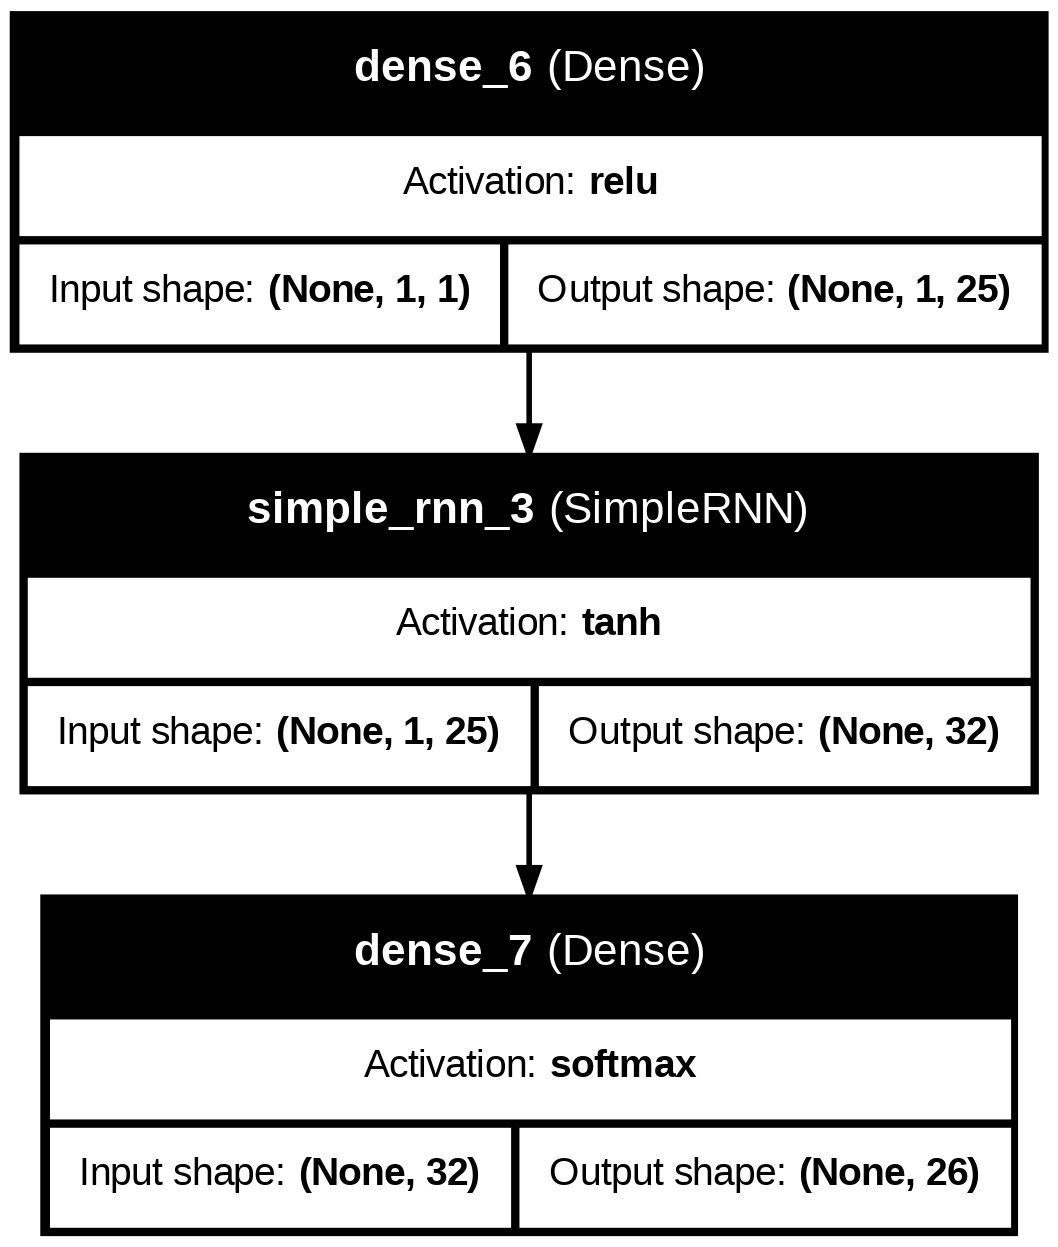

In [119]:
plot_model(
    model,
    show_layer_activations=True,
    show_shapes=True,
    show_layer_names=True
)

In [120]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [121]:
model.fit(
    X, y_new,
    epochs=1000,
    batch_size=1
)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2799
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2603 
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2223 
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2086 
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0810 - loss: 3.1610     
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.1904 
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.1900 
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.1409 
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.0411
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1574 - loss: 3.0130 
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.0032 
Epo

In [122]:
model.evaluate(X,y_new, batch_size=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1745  


[0.07916063070297241, 1.0]

In [133]:
test = 'ABC'

while True:
    test = test[-3:]
    test_n = np.array([char_to_int[i] for i in test])
    test_n = test_n/25
    test_n = np.reshape(test_n, (1,seq_length,1))
    pred = model.predict(test_n, verbose=0)
    index=np.argmax([pred])
    char = int_to_char[index]
    test+=char
    print(f'{test}-->{char}')
    if index==25:
        break

ABCD-->D
BCDE-->E
CDEF-->F
DEFG-->G
EFGH-->H
FGHI-->I
GHIJ-->J
HIJK-->K
IJKL-->L
JKLM-->M
KLMN-->N
LMNO-->O
MNOP-->P
NOPQ-->Q
OPQR-->R
PQRS-->S
QRST-->T
RSTU-->U
STUV-->V
TUVW-->W
UVWX-->X
VWXY-->Y
WXYZ-->Z
